## **Classification Algorithms**
* Decision Trees
* Random Forest

## **Dataset**

The dataset choosen for this experiment is social advertising dataset. The dataset contains 400 samples and 5 columns.

### **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### **Data Preprocessing**

In [ ]:
def convert_gender(s: str) -> int:
    s = s.lower()
    if s == "male":
        return 0
    elif s == "female":
        return 1
    else:
        return -1

In [ ]:
FILE_PATH = "/content/drive/MyDrive/NPCI Bootcamp/Fundamentals of Machine Learning/In-Class-Problems/Datasets/Day05/social_advertising.csv"
data = pd.read_csv(FILE_PATH, converters={"Gender": convert_gender})
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [ ]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.510000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,1.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


### **Splitting data into train and test sets**

In [ ]:
features = data.drop(['Purchased'], axis=1) 
target = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
X_train.shape, X_test.shape

((300, 4), (100, 4))

### **Decision Trees**

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

train_preds = dt_model.predict(X_train)
test_preds = dt_model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, train_preds)*100:.2f}%")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds)*100:.2f}%")

Train Accuracy: 93.67%
Test Accuracy: 88.00%


In [ ]:
roc_auc_score(y_test, test_preds)

0.8601458601458601

### **Random forest**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, train_preds)*100:.2f}%")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds)*100:.2f}%")

Train Accuracy: 93.67%
Test Accuracy: 93.00%


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

train_preds = lr_model.predict(X_train)
test_preds = lr_model.predict(X_test)

print(f"Train Accuracy: {accuracy_score(y_train, train_preds)*100:.2f}%")
print(f"Test Accuracy: {accuracy_score(y_test, test_preds)*100:.2f}%")

Train Accuracy: 78.33%
Test Accuracy: 75.00%


In [ ]:
roc_auc_score(y_test, test_preds)

0.6788931788931789

## **Performance Metrics**

In [ ]:
confusion_matrix(y_test, test_preds)

array([[57,  6],
       [ 1, 36]])

In [ ]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.86      0.97      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



In [ ]:
f1_score(y_test, test_preds, average='weighted')

0.9307689088816821

In [ ]:
roc_auc_score(y_test, test_preds)

0.938867438867439

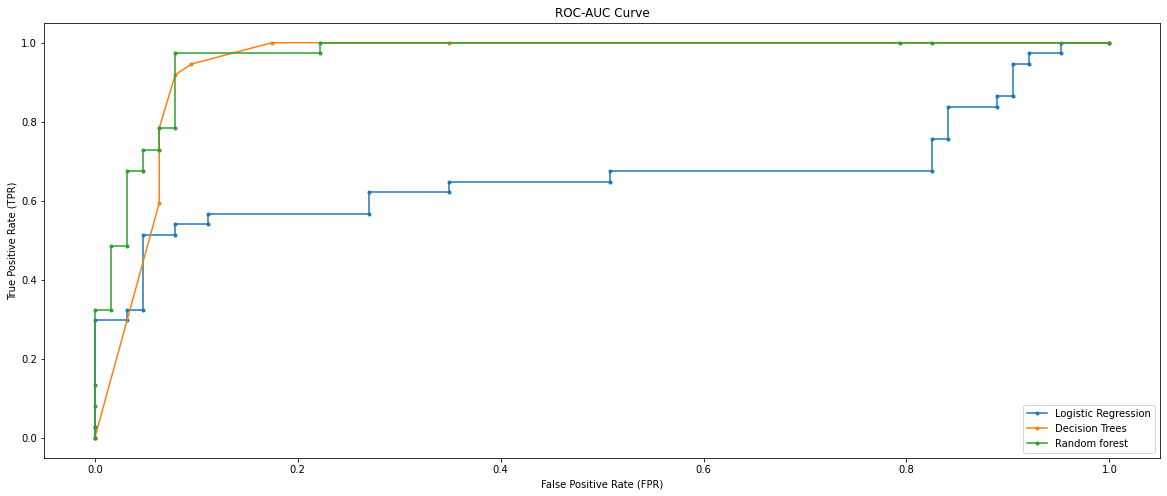

In [ ]:
lr_probs = lr_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]


dt_probs = dt_model.predict_proba(X_test)
dt_probs = dt_probs[:, 1]


rf_probs = rf_model.predict_proba(X_test)
rf_probs = rf_probs[:, 1]

lr_fpr, lr_tpr, lr_thresh = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, dt_thresh = roc_curve(y_test, dt_probs)
rf_fpr, rf_tpr, rf_thresh = roc_curve(y_test, rf_probs)


plt.figure(figsize=(20, 8))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Trees')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random forest')

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC-AUC Curve")

plt.legend(loc='lower right')
plt.show()
plt.close()


In [ ]:
precision_recall_curve()

(array([0.        , 0.06349206, 0.06349206, 0.06349206, 0.07936508,
        0.0952381 , 0.17460317, 0.34920635, 1.        ]),
 array([0.        , 0.59459459, 0.72972973, 0.78378378, 0.91891892,
        0.94594595, 1.        , 1.        , 1.        ]),
 array([2.        , 1.        , 0.92307692, 0.6       , 0.5       ,
        0.4       , 0.25      , 0.02380952, 0.        ]))